# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.nsls2 import tes_shadow

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             dof_bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes_shadow
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


8


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


   kbv_x_rot  kbv_offz    fitness
0   0.005665 -0.072221  22.889115
1  -0.044335  0.150001  20.492563
2  -0.069335  0.483335  19.429715
3   0.055665  0.261112  18.315553
4   0.080665  0.038890  17.962145
5   0.030665 -0.183332  20.717393
6  -0.019335 -0.294443  21.956769
7  -0.094335 -0.405554  19.951410


('0ea86614-54ed-4eb9-83ce-b199204a647b',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
RE(boa.learn(strategy='explore', n_iter=4, n_per_iter=1))
RE(boa.learn(strategy='exploit', n_iter=4, n_per_iter=1))

learning with strategy "explore" ...


9


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


   kbv_x_rot  kbv_offz    fitness
8   0.096474  -0.49832  15.986294


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
10


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


   kbv_x_rot  kbv_offz  fitness
9   0.097742  0.492655      NaN


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
11


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  fitness
10   0.099892  0.498982      NaN


12


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz    fitness
11  -0.098902 -0.002283  18.962191


learning with strategy "exploit" ...


13


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz    fitness
12  -0.014122 -0.093411  22.116544


14


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz    fitness
13   0.007012  0.020412  22.290514


15


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz    fitness
14  -0.051708 -0.214108  20.180548


16


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['disp', 'maxiter'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz    fitness
15   0.002538 -0.113324  23.306895


('a7a8c887-db4a-4cd5-9627-b03df0e0e141',
 'ef697812-8b7a-4eb3-93cb-1d91340e92a6',
 'b7196fa5-b1e4-4909-92f8-eb90dd43f3c2',
 '6c8e937c-272f-411a-9bc1-4776d5047f13')

We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

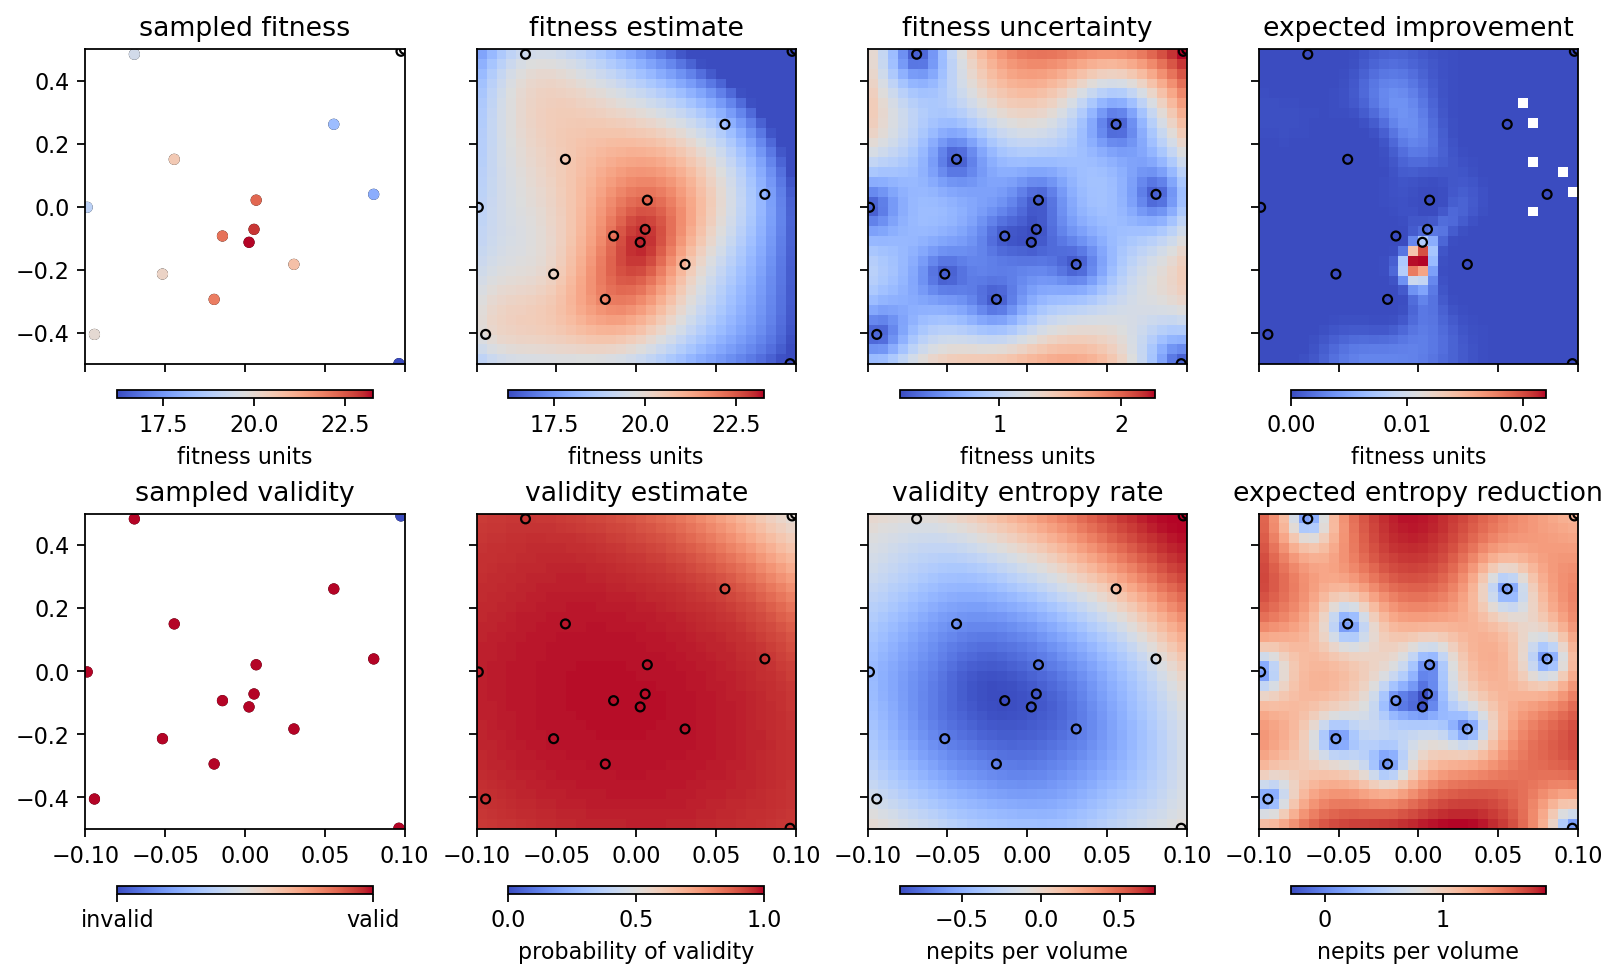

In [4]:
boa.plot_state(gridded=True)